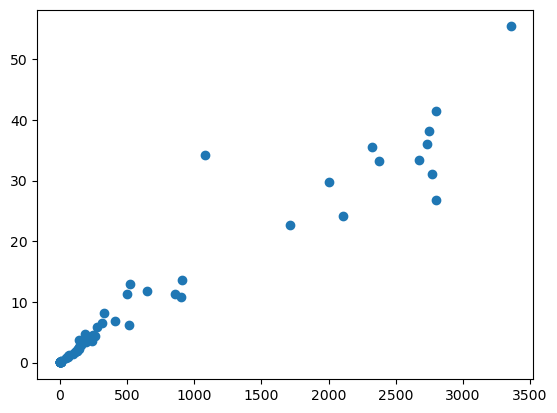

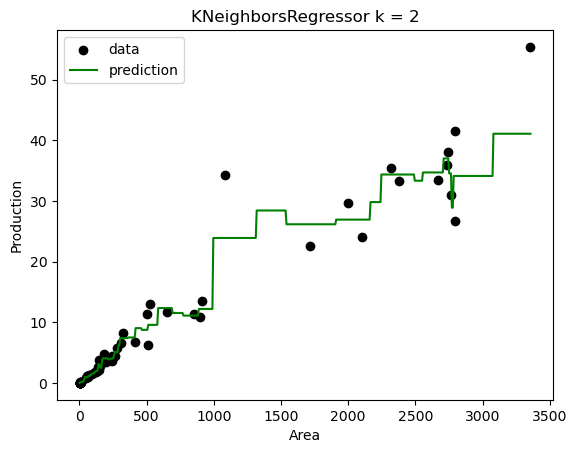

2.9075123158237295

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

#plt.ion()
# Read the dataset
df_train = pd.read_csv("./potatoes.csv", index_col=0)
df_train.shape

# Do the plot
plt.scatter(df_train["Area"], df_train["Production"])
plt.show()


from sklearn import neighbors

k = 2
X = df_train["Area"].values[:,np.newaxis] # column matrix instead of line vector
y = df_train["Production"]

knn = neighbors.KNeighborsRegressor(k)

# Fit regression model
knn.fit(X, y)

# Visualization

xsupport = np.linspace(min(df_train['Area']),max(df_train['Area']),500)
pred = knn.predict(xsupport[:,np.newaxis]) 

plt.scatter(X, y, c='k', label='data')
plt.plot(xsupport, pred, c='g', label='prediction')
plt.xlabel("Area")
plt.ylabel("Production")
plt.legend()
plt.title("KNeighborsRegressor k = " + str(k))
plt.show()


from sklearn.metrics import mean_squared_error
yhat_train = knn.predict(X)
mean_squared_error(y, yhat_train)
np.sqrt(mean_squared_error(y, yhat_train))


## Question 1

The domain set of the instances present in the dataset is included in ℝ, or to be more precised in the interval (0,3500).
X and xsupport are both sets of points in the same interval ⊂ ℝ. However X and xsupport are of very different natures. X is a sample from a random probability distribution while xsupport is obtained by a deterministic procedure (select evenly-spaced points from the interval).


## Question 2

In [13]:
# Load the test set
df_test = pd.read_csv("./potato_extra.csv")
X_test = df_test["Area"].values[:,np.newaxis] # column matrix instead of line vector
y_test = df_test["Production"]

# Make a prediction of the target using the model trained on the train set
yhat_test = knn.predict(X_test)

# Compute the generalization error
mean_squared_error(y_test, yhat_test)

52.34596021666665

## Question 3

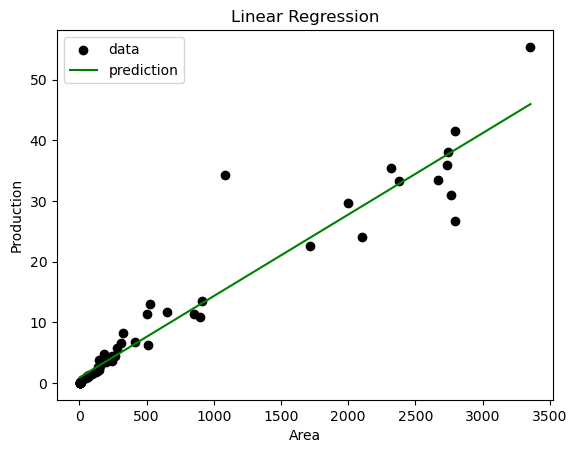

9.081918924031022

In [14]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X,y)

pred = linreg.predict(xsupport[:,np.newaxis]) 

plt.scatter(X, y, c='k', label='data')
plt.plot(xsupport, pred, c='g', label='prediction')
plt.xlabel("Area")
plt.ylabel("Production")
plt.legend()
plt.title("Linear Regression")
plt.show()


yhat_train = linreg.predict(X)
np.sqrt(mean_squared_error(y, yhat_train))

yhat_test = linreg.predict(X_test)

# Compute the generalization error
np.sqrt(mean_squared_error(y_test, yhat_test))

The generalization error for linear regression is higher than the generalization error for K-nearest Neighbors aznd then it seem preferable to use K-Nearest Neighbors for this dataset.

## Question 4

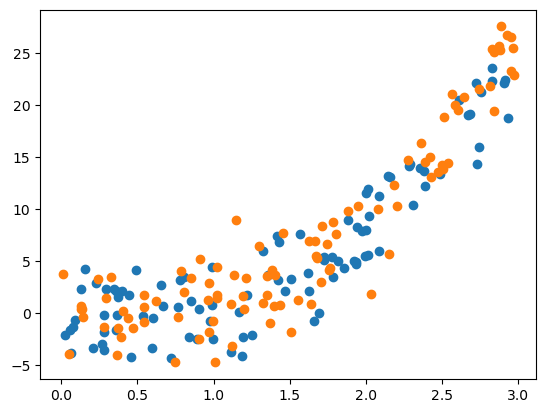

In [15]:
def simulate_data(n_samples):
    """
    Function to sample a simulated dataset
    """
    df = pd.DataFrame()
    df['x'] = np.random.uniform(size=n_samples)*3
    df['y'] = df['x']**3+3*np.random.normal(size=n_samples)
    return df


n_samples = 100 # number of samples

# Let us generate one random dataset and plot it
df_train = simulate_data(n_samples)
plt.scatter(df_train['x'], df_train['y'])

# Let us generate another random dataset and plot it
df_train = simulate_data(n_samples)
plt.scatter(df_train['x'], df_train['y'])

# Look at the difference between the two datasets.
plt.show()




In [16]:

# Now we will do several experiments to assess the variability of the estimation.

repeats = 100
gen_errors = [] # generalization errors
emp_errors = [] # training errors
k = 5

for r in range(repeats): # We do several times the experiment experiments
    # Simulate and the training data
    df_train = simulate_data(n_samples)
    X = df_train["x"].values[:,np.newaxis] # column matrix instead of line vector
    y = df_train["y"]
    
    # Simulate the test data
    test = simulate_data(500)
    X_test = test["x"].values[:,np.newaxis] # column matrix instead of line vector
    y_test = test["y"]
    
    # Train the estimator
    knn = neighbors.KNeighborsRegressor(k)
    knn.fit(X, y)

    # Predict and compute the error
    yhat_train = knn.predict(X)
    emp_errors.append(np.sqrt(mean_squared_error(y, yhat_train)))
    yhat_test = knn.predict(X_test)
    gen_errors.append(np.sqrt(mean_squared_error(y_test, yhat_test)))

train_sample_errors = pd.DataFrame({"empirical":emp_errors,"generalization":gen_errors})
train_sample_errors.describe()

empirical  generalization
count  100.000000      100.000000
mean     2.682544        3.296623
std      0.212786        0.142077
min      2.084945        2.943690
25%      2.531481        3.192058
50%      2.703200        3.304791
75%      2.848054        3.375543
max      3.275986        3.754869